## Análise de Dados do Titanic - Parte 3

### Introdução  
Este notebook contém a **terceira etapa** do projeto de análise de dados utilizando o dataset oficial do Titanic, disponível no Kaggle. O foco desta fase é a **criação de visualizações gráficas** que auxiliem na identificação de padrões de sobrevivência entre os passageiros, com o uso de bibliotecas como Seaborn, Matplotlib e Plotly.

---

### 1. Gráfico de Sobrevivência por Gênero  
- Criar um gráfico de barras que mostra a quantidade de passageiros que sobreviveram ou não, separados por gênero (`Sex`).

### 2. Boxplot: Tarifa Paga x Sobrevivência  
- Exibir um boxplot relacionando o valor pago na tarifa (`Fare`) com a variável de sobrevivência (`Survived`), identificando diferenças de distribuição entre os grupos.

### 3. Histograma: Idade x Sobrevivência  
- Criar um histograma com a distribuição das idades dos passageiros, diferenciando por cor os que sobreviveram e os que não sobreviveram.

### 4. Gráfico de Sobrevivência por Classe e Sexo  
- Criar um gráfico de barras agrupado que mostra a taxa de sobrevivência por classe da embarcação (`Pclass`), separando por sexo (`Sex`).

### 5. Gráfico de Sobrevivência por Faixa Etária  
- Utilizar a coluna `Faixa_Etaria` (criada na etapa anterior) para exibir um gráfico de barras com a média de sobrevivência por grupo etário.

**Dataset original:** [Titanic - Kaggle](https://www.kaggle.com/competitions/titanic)

*Autor: [Nayara C. Kakihara]*




In [8]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#carregar os dados tratados
df = pd.read_csv('dados_tratados.csv') 


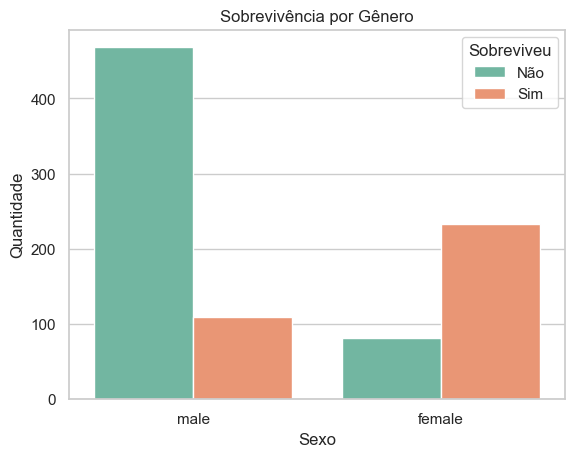

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

#gráfico de barras: sobrevivência por gênero
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Sobrevivência por Gênero')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()


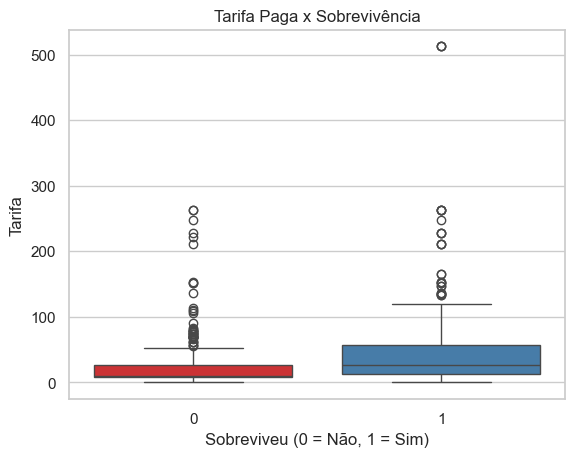

In [10]:
#Boxplot: tarifa por grupo de sobreviventes (ajustado para evitar o aviso)
sns.boxplot(data=df, x='Survived', y='Fare', hue='Survived', palette='Set1', legend=False)
plt.title('Tarifa Paga x Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Tarifa')
plt.show()



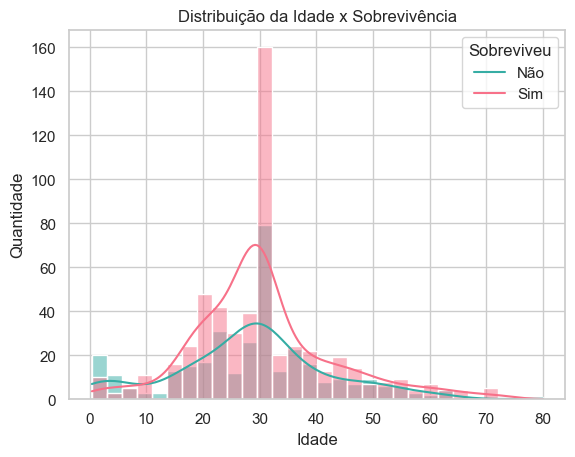

In [11]:
#histograma: distribuição de idade com base na sobrevivência
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='husl')
plt.title('Distribuição da Idade x Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()


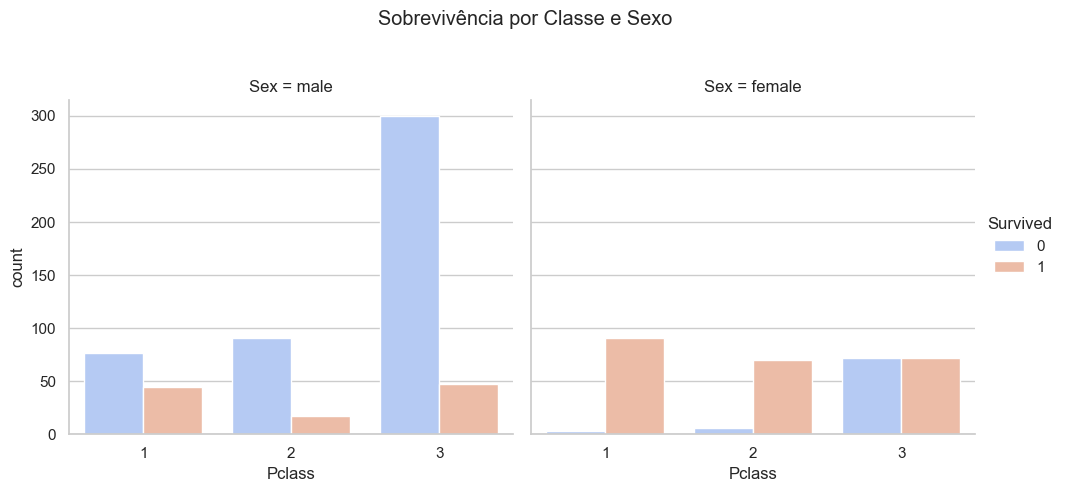

In [12]:
#gráfico de barras agrupado: sobrevivência por classe e sexo
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count', palette='coolwarm')
plt.subplots_adjust(top=0.8)
plt.suptitle('Sobrevivência por Classe e Sexo')
plt.show()


In [16]:
#função para definir a faixa etária
def faixa_etaria(age):
    if age <= 12:
        return 'Criança'
    elif age <= 18:
        return 'Adolescente'
    elif age <= 35:
        return 'Jovem Adulto'
    elif age <= 60:
        return 'Adulto'
    else:
        return 'Idoso'

#criar a coluna 'Faixa_Etaria' aplicando a função
df['Faixa_Etaria'] = df['Age'].apply(faixa_etaria)

#verificar se a coluna foi criada corretamente
print(df.columns)
print(df.head())


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Faixa_Etaria'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Faixa_Etaria  
0      0         A/5 21171   7.2500        S  Jovem Adulto  
1      0          PC 17599  71.2833   

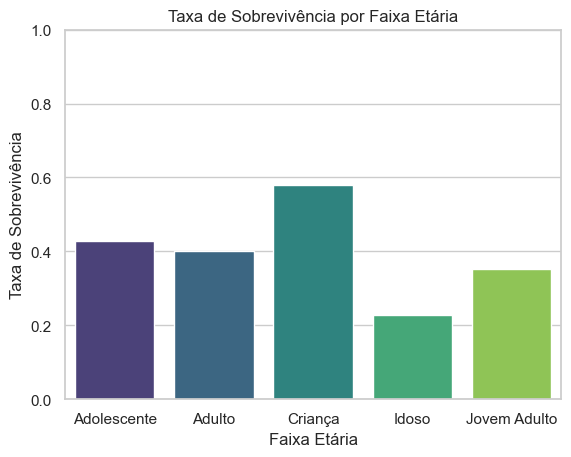

In [18]:
#agrupamento por faixa etária e cálculo da taxa de sobrevivência
taxa = df.groupby('Faixa_Etaria')['Survived'].mean().reset_index()

#gráfico de barras: Taxa de Sobrevivência por Faixa Etária
sns.barplot(data=taxa, x='Faixa_Etaria', y='Survived', palette='viridis', hue='Faixa_Etaria')
plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Faixa Etária')
plt.ylim(0, 1)
plt.show()

